# Análisis Dataset CDRs #

**¿Qué son los CDRs de datos móviles?**

Los Registros de Detalles de Llamadas (CDRs, por sus siglas en inglés) de datos móviles son registros generados por los operadores de redes móviles cada vez que un usuario utiliza datos móviles para navegar por internet, usar aplicaciones, enviar correos electrónicos, etc. Estos registros contienen metadatos que describen el uso de los datos móviles, sin incluir el contenido de las actividades realizadas. Los CDRs de datos móviles incluyen información como:

    Número de teléfono: El número asociado al dispositivo móvil que utiliza los datos.
    Fecha y hora: Cuándo comenzó y terminó la sesión de datos.
    Duración de la sesión: Cuánto tiempo duró la sesión de datos.
    Volumen de datos: La cantidad de datos transmitidos durante la sesión, generalmente medida en megabytes (MB) o gigabytes (GB).
    Tipo de servicio: La naturaleza del servicio utilizado, como navegación web, transmisión de video, o uso de aplicaciones.
    Ubicación: La torre celular a través de la cual se realizó la conexión de datos, lo que permite aproximar la ubicación del usuario.

Estos registros son cruciales para que los operadores de telecomunicaciones puedan facturar a los usuarios según su consumo de datos. Además, los CDRs de datos móviles permiten a los operadores monitorear el uso de la red, optimizar su rendimiento, y detectar posibles fraudes o usos indebidos​​.

Los CDRs de datos también tienen aplicaciones más amplias, como el diseño de planes de datos personalizados, y la mejora de los servicios ofrecidos por los operadores. En el campo de la ciencia de datos, estos registros pueden ser analizados para obtener insights valiosos sobre el comportamiento de los usuarios y la eficiencia de la red​.


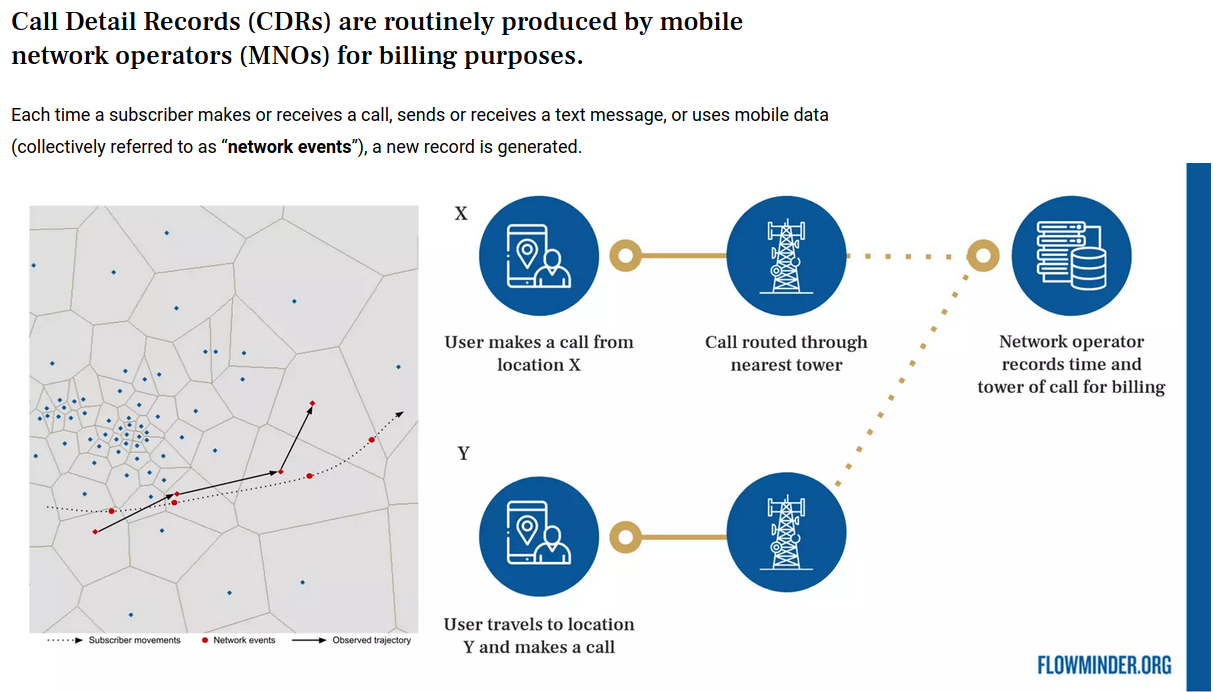

A partir de un dataset en bruto se realiza el curado del mismo. Luego se continúa con el análisis en pos de encontrar patrones comúnes entre algunos usuarios. 

**Necesidad de Negocio:** Se necesita configurar cada APN de manera de minimizar la cantidad de registros generados por el trafico de los dispositivos conectados al mismo. Para ello es necesario establecer una configuración técnica para cada APN. Lo mejor es agrupar los distintos tipos de comportamiento de tráfico en cada APN. Luego será necesario agrupar APNs con comportamientos similares para aplicarles la misma configuración por grupo. De esa forma se minimiza la cantidad de distintas configuraciones a gestionar.

## Data Set ##
Se presenta el dataset con su diversidad de campos ya listo para los pasos siguientes.

| **Campo**     | **Tipo** | **Descripción**                                |
|---------------|----------|------------------------------------------------|
| **IdTD**      | Numeric  | Identificador de detalle del tráfico de datos  |
| **ICCID**     | Text     | ICCID                                          |
| **MSISDN**    | Numeric  | MSISDN                                         |
| **IMSI**      | Numeric  | IMSI                                           |
| **NAccount**  | Numeric  | Número de cuenta                               |
| **Chargeable?** | Boolean | Etiqueta Cobrable                            |
| **FactCicle** | Numeric  | Ciclo de facturación                           |
| **SIMStatus** | Numeric  | Estado de SIM                                  |
| **Tserv**     | Text     | Tipo de servicio                               |
| **IdRP**      | Numeric  | Número de plan de precios asignado             |
| **IdRZ**      | Numeric  | Identificador de la zona de precios asignada   |
| **UsoNoPico** | Boolean  | Etiqueta de uso en no pico                     |
| **DReg**      | Time     | Fecha de recepción del registro                |
| **Tdata**     | Numeric  | Uso de datos - Total sin procesar              |
| **Udata**     | Numeric  | Uso de datos - Subida sin procesar             |
| **Ddata**     | Numeric  | Uso de datos - Bajada sin procesar             |
| **RoundData** | Numeric  | Uso de datos - Redondeado                      |
| **APN**       | Text     | APN                                            |
| **IPv4**      | Text     | Dirección IPv4                                 |
| **Network**   | Numeric  | Red del operador                               |
| **DIni**      | Time     | Hora de inicio del registro                    |
| **Duration**  | Numeric  | Duración de la sesión                          |
| **Nsec**      | Numeric  | Número de secuencia del registro               |
| **IdCharge**  | Numeric  | Número de cargo                                |
| **CloseCod**  | Numeric  | Cerrar causa de sesión                         |
| **TAP**       | Text     | Código de TAP                                  |
| **IdAccountOp** | Numeric | ID de cuenta del operador                    |
| **IdRPVersion** | Numeric | Identificador de la versión de plan de precios|
| **IdFlow**    | Numeric  | Identificador de flujo                         |
| **SGSN**      | Text     | SGSN en servicio                               |
| **CallTech**  | Numeric  | Tipo de tecnología de llamada                  |


In [1]:
archivo='JWCC_20240322_DataUsage_27014_003637_045550'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el formato de visualización de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

#fechas
fecha=archivo[7:13]

### Se importa el Dataset en bruto ###
Se setean los parámetros de importación apropiados.

In [3]:
df=pd.read_csv( archivo + '.txt', sep='\|',engine='python')

In [4]:
df.sample()

,12838761435713,89543680116000588016,542246514445,722368000058801,100157814,Y,253,6,data,95514,706,N,20240321210750,84,54,30,1024,m2m.personal.com,100.103.115.19,19103,20240321210741,9,0,406154612,0.1,ARG01,70836788,2658014,-1,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,186.143.192.10,-1.1,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
2355661,12829153326113,89543680617003543536,543537525285,722368000354353,100170413,Y,253,6,data,283213,706,N,20240321103502,159109,159109,0,159109,validadorasnssa.personal.com,10.159.44.197,19101,20240321063501,14400,1,28397063,17,ARGTP,990748,2368714,-1,NaN,NaN,NaN,NaN,NaN,NaN,181.111.112.41,-1,NaN,NaN,NaN,NaN,NaN


## Data Wrangling ##
- Se agregan encabezados según el diccionario.
- Se formatean campos fecha y hora.
- Se configuran varios campos con el tipo apropiado para optimizar memoria.
- Se configuran varios campos como categóricos debido a su limitada variabilidad.


In [5]:
df.columns=['IdTD','ICCID','MSISDN','IMSI','NAccount','Chargeable?','FactCycle','SIMStatus','Tserv','IdRP','IdRZ','UsoNoPico','DReg','Tdata','Udata','Ddata','RoundData','APN','IPv4','Network','DIni','Duration','Nsec','IdCharge','CloseCod','TAP','IdAccountOp','IdRPVersion','IdFlow','CGI','SAI','RAI','TAI','ECGI','LAI','SGSN','CallTech','AddGGSN','Hini','Hend','DelaySession','IPv6']

Se dropean campos que no intervienen en el análisis y permiten la anonimización de los registros.

In [6]:
# Se eliminan las columnas 'ICCID', 'MSISDN' y 'IMSI'
df = df.drop(['ICCID', 'MSISDN', 'IMSI'], axis=1)

In [7]:
# Se asegura que 'DReg' sea de tipo datetime
# DReg	Time	Fecha de recepción del registro
df['DReg'] = pd.to_datetime(df['DReg'], format='%Y%m%d%H%M%S')
# DIni	Time	Hora de inicio del registro
df['DIni'] = pd.to_datetime(df['DIni'], format='%Y%m%d%H%M%S')

In [8]:
# 'Chargeable?'
df['Chargeable?'] = df['Chargeable?'].astype('category')

In [9]:
#FactCycle
df['FactCycle'] = df['FactCycle'].astype('int16')

In [10]:
#SIMStatus
df['SIMStatus'] = df['SIMStatus'].astype('category')

In [11]:
#IdRP
df['IdRP'] = df['IdRP'].astype('int32')

In [12]:
# IdRP	Numeric,	Número de plan de precios asignado
df['IdRZ'].value_counts()

IdRZ
706    3331254
Name: count, dtype: int64

In [13]:
df['IdRZ'] = df['IdRZ'].astype('category')

In [14]:
#UsoNoPico	Boolean,	Etiqueta de uso en no pico
df['UsoNoPico'] = df['UsoNoPico'].astype('category')

Los campos siguientes son muy importantes para mi análisis de clasificación:
- *Tdata*	Numeric	Uso de datos - Total sin procesar
- *Udata*	Numeric	Uso de datos - Subida sin procesar
- *Ddata*	Numeric	Uso de datos - Bajada sin procesar


In [15]:
# Calcular los rangos numéricos
rango_Tdata = (df['Tdata'].min(), df['Tdata'].max())
rango_Udata = (df['Udata'].min(), df['Udata'].max())
rango_Ddata = (df['Ddata'].min(), df['Ddata'].max())
# Imprimir los rangos numéricos
print("Rango de Tdata:", rango_Tdata)
print("Rango de Udata:", rango_Udata)
print("Rango de Ddata:", rango_Ddata)

Rango de Tdata: (0, 107851551)
Rango de Udata: (0, 90793549)
Rango de Ddata: (0, 29647694)


In [16]:
# Network	Numeric,	Red del operador
rango_Network = (df['Network'].min(), df['Network'].max())
print("Rango de Network:", rango_Network)

Rango de Network: (19101, 85302)


In [17]:
df['Network'] = df['Network'].astype('int32')

Otro campo importante para la clasificación es Duration:
- *Duration*	Numeric,	Duración de la sesión

In [18]:
# Calcular los rangos numéricos
rango_Duration = (df['Duration'].min(), df['Duration'].max())

# Nsec	Numeric	Número de secuencia del registro
# IdCharge	Numeric	Número de cargo
# CloseCod	Numeric	Cerrar causa de sesión
rango_Nsec = (df['Nsec'].min(), df['Nsec'].max())
rango_IdCharge = (df['IdCharge'].min(), df['IdCharge'].max())
rango_CloseCod = (df['CloseCod'].min(), df['CloseCod'].max())

# Imprimir los rangos numéricos
print("Rango de Duration:", rango_Duration)
print("Rango de Nsec:", rango_Nsec)
print("Rango de IdCharge:", rango_IdCharge)
print("Rango de CloseCod:", rango_CloseCod)

Rango de Duration: (0, 172038)
Rango de Nsec: (0, 5036)
Rango de IdCharge: (8388736, 4294706950)
Rango de CloseCod: (0, 17)


In [19]:
df['Duration'] = df['Duration'].astype('int32')
df['Nsec'] = df['Nsec'].astype('int16')
df['CloseCod'] = df['CloseCod'].astype('category')

In [20]:
# TAP	Text	Código de TAP
df['TAP'] = df['TAP'].astype('category')
# IdFlow	Numeric	Identificador de flujo
df['IdFlow'] = df['IdFlow'].astype('category')

In [21]:
# IdAccountOp	Numeric	ID de cuenta del operador
# IdRPVersion	Numeric	Identificador de la versión de plan de precios

# Calcular los rangos numéricos
rango_IdAccountOp = (df['IdAccountOp'].min(), df['IdAccountOp'].max())
rango_IdRPVersion = (df['IdRPVersion'].min(), df['IdRPVersion'].max())
print("Rango de IdAccountOp:", rango_IdAccountOp)
print("Rango de IdRPVersion:", rango_IdRPVersion)

Rango de IdAccountOp: (717577, 789456123)
Rango de IdRPVersion: (866314, 2661314)


In [22]:
# Se optimiza el tipo de datos
df['IdAccountOp'] = df['IdAccountOp'].astype('int32')
df['IdRPVersion'] = df['IdRPVersion'].astype('int32')

In [23]:
 #29  CGI           float64, 30  SAI           float64, 31  RAI           float64       
 #32  TAI           float64, 33  ECGI          float64, 34  LAI           float64

# Obtener estadísticas descriptivas solo para los campos especificados
descripcion = df[['CGI', 'SAI', 'RAI', 'TAI', 'ECGI', 'LAI']].describe()

# Imprimir las estadísticas descriptivas
print(descripcion)

       CGI  SAI  RAI  TAI  ECGI  LAI
count 0.00 0.00 0.00 0.00  0.00 0.00
mean   NaN  NaN  NaN  NaN   NaN  NaN
std    NaN  NaN  NaN  NaN   NaN  NaN
min    NaN  NaN  NaN  NaN   NaN  NaN
25%    NaN  NaN  NaN  NaN   NaN  NaN
50%    NaN  NaN  NaN  NaN   NaN  NaN
75%    NaN  NaN  NaN  NaN   NaN  NaN
max    NaN  NaN  NaN  NaN   NaN  NaN


Se observa que éstas columnas no aportan información, por lo tanto se dropean.

In [24]:
# Eliminar las columnas con todos los valores NaN
df.dropna(axis=1, how='all', inplace=True)

In [25]:
# Calcular los rangos numéricos
rango_CallTech = (df['CallTech'].min(), df['CallTech'].max())
# Imprimir los rangos numéricos
print("Rango de CallTech:", rango_CallTech)

Rango de CallTech: (-1, -1)


Este campo no trae información útil y por lo tanto no se utilizará.

In [26]:
df['CallTech'] = df['CallTech'].astype('category')

In [27]:
df.sample()

,IdTD,NAccount,Chargeable?,FactCycle,SIMStatus,Tserv,IdRP,IdRZ,UsoNoPico,DReg,Tdata,Udata,Ddata,RoundData,APN,IPv4,Network,DIni,Duration,Nsec,IdCharge,CloseCod,TAP,IdAccountOp,IdRPVersion,IdFlow,SGSN,CallTech
2504865,12821373197713,100064413,Y,253,6,data,412114,706,N,2024-03-21 01:18:51,1919,1007,912,2048,m2m.personal.com,100.90.10.242,19101,2024-03-21 01:17:16,14,0,27227622,0,ARGTP,65423188,2652314,-1,181.88.119.248,-1


Se dropean algunas columnas más que no contienen información importante para el análisis siguiente. El df original tiene varias columnas con diversa información.

Tdata=Udata+Ddata   # Por ello se dropean Udata y Ddata, ya que la información de ambas está contenida en Tdata

In [28]:
columns_to_drop = ['DReg','DIni','IdRP','Udata','Ddata','Chargeable?', 'FactCycle', 'SIMStatus', 'Tserv', 'IdRZ', 'UsoNoPico', 'RoundData', 'IPv4', 'Network', 'IdCharge', 'TAP', 'IdAccountOp', 'IdRPVersion', 'IdFlow', 'SGSN', 'CallTech']
df.drop(columns_to_drop, axis=1, inplace=True)

**Se presenta el df configurado de manera óptima.**

In [29]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331254 entries, 0 to 3331253
Data columns (total 7 columns):
 #   Column    Dtype   
---  ------    -----   
 0   IdTD      int64   
 1   NAccount  int64   
 2   Tdata     int64   
 3   APN       object  
 4   Duration  int32   
 5   Nsec      int16   
 6   CloseCod  category
dtypes: category(1), int16(1), int32(1), int64(3), object(1)
memory usage: 123.9+ MB


### Label Encoder ###
Para simplificar la representación, preparar la información para el trabajo con Machine Learning y mantener la confidencialidad de los campos NAccount y APN utilizo éste módulo de SkLearn.

In [30]:
from sklearn.preprocessing import LabelEncoder

# Codificar la columna a valores numéricos
label_encoder = LabelEncoder()
df['NAccount_N'] = label_encoder.fit_transform(df['NAccount'])
df['APN_N'] = label_encoder.fit_transform(df['APN'])

# Se guarda el DataFrame resultante como un archivo CSV, allí está la relación de camos codificados con los que no.
df.to_csv('selected_features.csv', index=False)

# Eliminar las columnas originales
df.drop(columns=['NAccount', 'APN'], inplace=True)

## Matríz de Correlación ##
Se correlacionan los campos del df total ya optimizado.

In [31]:
df.sample(5)   

,IdTD,Tdata,Duration,Nsec,CloseCod,NAccount_N,APN_N
222960,12829445385113,242,1634,0,0,44,0
2692263,12832415905613,1650,161,0,0,82,17
3135727,12838547554313,855,29,0,0,3,17
976783,12822706544113,0,298,0,0,3,17
703994,12821237671713,0,21,0,0,30,17


Se aclara que IdTD se mantiene como referencia de trazabilidad de datos con el orígen. No contiene datos relevantes de por sí.
* IdTD:	Numeric,	Identificador de detalle del tráfico de datos

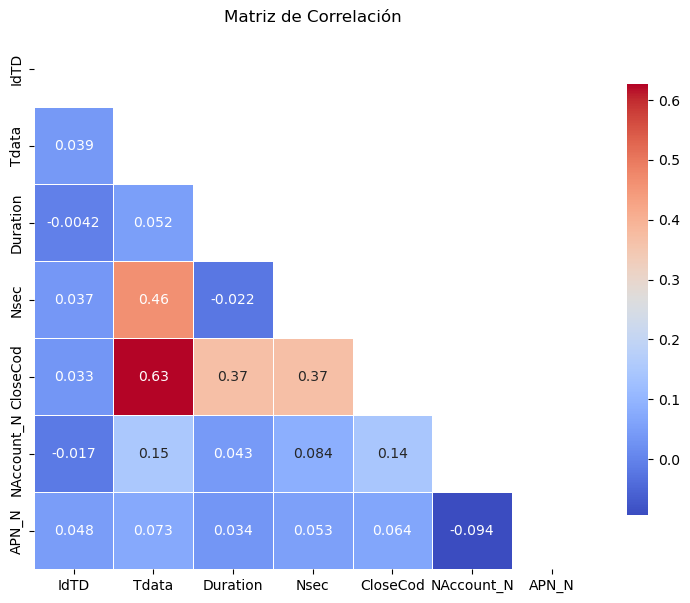

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
# Generar una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Establecer el tamaño de la figura
plt.figure(figsize=(9, 7))

# Crear el mapa de calor
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})

# Ajustar los títulos y etiquetas
plt.title('Matriz de Correlación')
plt.show()

- Se encuentra que CloseCod tiene una correlación moderadamente fuerte (0,63) con Tdata. Se preferirá utilizar Tdata para los análisis siguientes por contener el valor absoluto del tráfico total.
- Para Nsec se tiene una correlación moderada (0,46) con Tdata. De forma similar se utilirá Tdata par los iguientes análisis.

## Hipótesis ##
Hablando de los campos de interés para el presente análisis, se establecen algunas hipótesis:
 - **Tdata:** Se espera que el total de datos consumidos por sesión tenga una distribución medianamente uniforme.
 - **Duration:** Al referirse a la duración de cada sesión de datos, se espera una distribución uniforme por considerar una cuestión con cierta variabilidad. Si se espera un valor mínimo de base para que la sesión contenga alguna información relevante. También puede haber cierta cantidad de registros de duración cero debido a errores de conexión.
 - **APN_N:** Aquí se espera gran cantidad de casos para un determinado APN que al ser de uso genérico concentra más casos. Otros no genéricos pertenecen a ciertas cuentas y por lo tanto tendrán menor cantidad de registros en relación a la cantidad de líneas de la cuenta.
 - **NAccount_N:** La distribución esperada en relación al número de cuenta será la resultante según la cantidad de líneas de la cuenta y la cantidad de conexiones. Por lo tanto tendrá una cantidad determinada según la cuenta.


In [33]:
# Luego de tantos drops tratamos en df de optimizar la memoria
import gc
gc.collect()

6371

### Distribución ###
Se analiza la distribución de los features seleccionadas en df.

array([[<Axes: title={'center': 'IdTD'}>,
        <Axes: title={'center': 'Tdata'}>],
       [<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Nsec'}>],
       [<Axes: title={'center': 'NAccount_N'}>,
        <Axes: title={'center': 'APN_N'}>]], dtype=object)

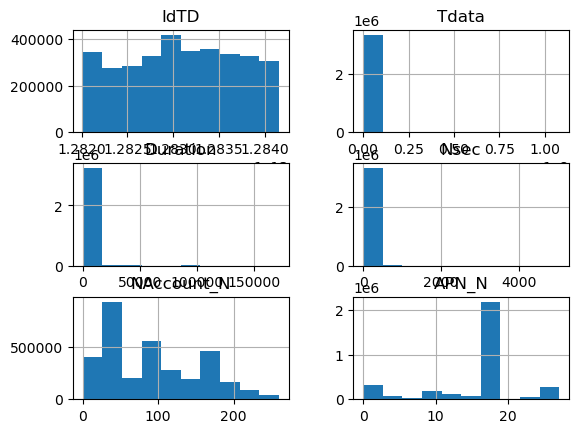

In [34]:
df.hist()

- **Tdata:** No se confirma la hipótesis para éste caso.
- **Duration:** No se encuentra un valor uniforme, ni un mínimo esperado. Lo que si se encuentra un grupo de sesiones de duración cero aunque no fue esperado encontrar la mayoría de casos como éste.
- **APN_N:** Se confirma lo esperado en la hipótesis planteada para éste caso.
- **NAccount_N:** Se confirma lo esperado en la hipótesis planteada para éste caso.

### Estandarización ###
Se aplica estandarización a Tdata y Duration esperando mejoras en la distribución.

In [35]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos (sin incluir APN_N)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Tdata', 'Duration']])

# Convertir a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=['Tdata', 'Duration'])

# Agregar APN_N sin escalar
df_standardized['APN_N'] = df['APN_N'].values

Se observa una mejora en la dispersión de valores de los campos tratados, pero no mejora la distribución. La misma se presenta muy densa en algunos sectores.

Ahora mediante un histograma de los campos estandarizados se observa más claro.

array([[<Axes: title={'center': 'Tdata'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

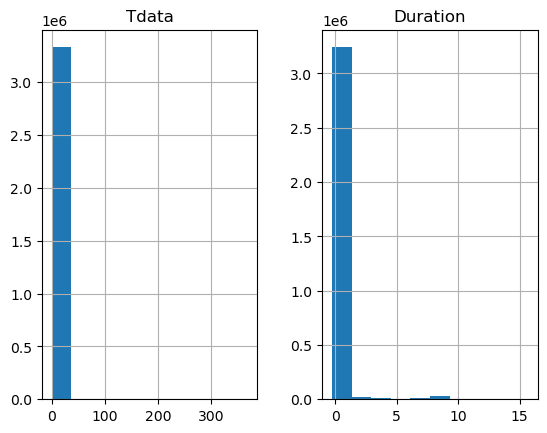

In [36]:
df_standardized.hist(['Tdata','Duration'])

### Normalización ###
Como alternativa a la estandarización se quiere comparar con la Normalización de los campos en los cuales se está focalizando.

In [37]:
from sklearn.preprocessing import MinMaxScaler
# Normalizar los datos (sin incluir APN_N)
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['Tdata', 'Duration']])

# Convertir a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=['Tdata', 'Duration'])

# Agregar APN_N sin escalar
df_normalized['APN_N'] = df['APN_N'].values

Para el análisis resulta más claro y útil el método de Escalado (el anterior) que el éste de Normalización.

array([[<Axes: title={'center': 'Tdata'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

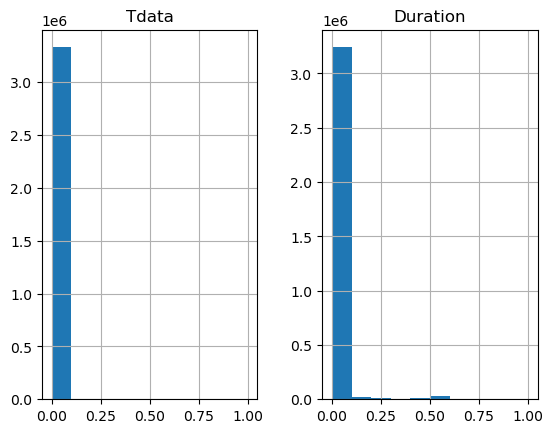

In [38]:
df_normalized.hist(['Tdata','Duration'])

### Mejora en la Distribución ###

Los campos Tdata y Duration tienen una distribución no uniforme haciendo que las concentraciones de datos se den en cierta zona del cubo 3D anterior.

* **Transformación Logarítmica:**
Puede ayudar a reducir la variabilidad en los datos, especialmente si tenemos datos sesgados positivamente (muchos valores pequeños y pocos valores grandes).

* **Transformación de Potencia (Power Transformation):**
Utiliza la Transformación de Box-Cox o Yeo-Johnson para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal.

* **Cuantiles uniformes:**
Transforma los datos de modo que sus valores sigan una distribución uniforme.

#### Transformación Logarítmica: ####

In [39]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import StandardScaler

# Aplicar la transformación logarítmica
df['Tdata_log'] = np.log1p(df['Tdata'])
df['Duration_log'] = np.log1p(df['Duration'])

# Estandarizar los datos transformados (aquí utilizando la transformación logarítmica)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Tdata_log', 'Duration_log']])

# Convertir a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=['Tdata_log', 'Duration_log'])

# Agregar APN_N sin escalar
df_standardized['APN_N'] = df['APN_N'].values

Surgen dos cuestiones en éste punto, no se debe usar normalización como ya se mencionó.

Seguidamente se analizan gráficamente las variables Tdata y Duration luego de una transformación Logarítmica.

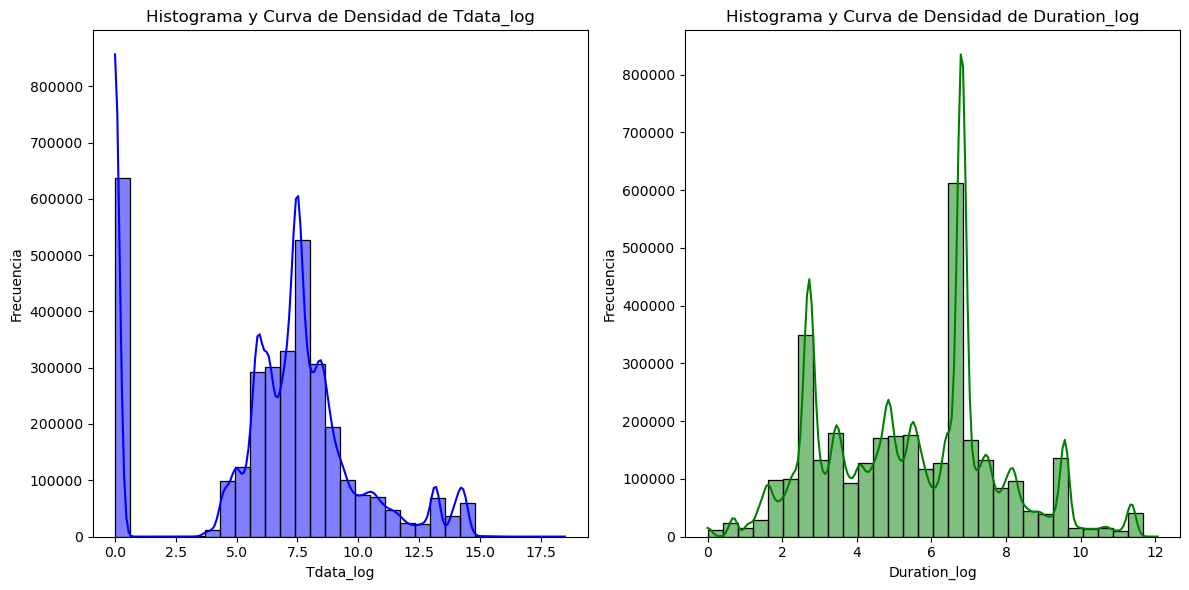

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas con curva de densidad para 'Tdata_log' y 'Duration_log'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma y curva de densidad para 'Tdata_log'
sns.histplot(df['Tdata_log'], bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Histograma y Curva de Densidad de Tdata_log')
axs[0].set_xlabel('Tdata_log')
axs[0].set_ylabel('Frecuencia')

# Histograma y curva de densidad para 'Duration_log'
sns.histplot(df['Duration_log'], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title('Histograma y Curva de Densidad de Duration_log')
axs[1].set_xlabel('Duration_log')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##### Análisis de Distribución para Transformación Logarítmica ######

In [46]:
import scipy.stats as stats
stats.describe(df.Tdata_log)

DescribeResult(nobs=3331254, minmax=(0.0, 18.496266321052875), mean=6.405111418836095, variance=13.626661260007895, skewness=-0.39414137754063183, kurtosis=-0.20068624250426348)

La distribución muestra una leve asimetría hacia la izquierda y es más plana que una distribución normal, con una media alrededor de 6.4 y una varianza que indica una dispersión moderada de los datos

In [47]:
import scipy.stats as stats
stats.describe(df.Duration_log)

DescribeResult(nobs=3331254, minmax=(0.0, 12.05547647427906), mean=5.465214646813276, variance=5.435054477827611, skewness=0.12940305293318527, kurtosis=-0.5677221365083294)

La distribución muestra una leve asimetría hacia la derecha y es más plana que una distribución normal. La media está alrededor de 5.47 y la varianza que indica una dispersión moderada de los datos. La distribución es relativamente simétrica y plana. Los valores están moderadamente dispersos alrededor de la media.

In [48]:
# Realizar el test de Shapiro
p_value = stats.shapiro(df.Tdata_log)

# Imprimir los resultados

print("Valor p:", p_value[1])

# Comparar con nivel de significancia de 0.05
nivel_significancia = 0.05

if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 4.794103128765166e-165
Los datos no siguen una distribución normal.


/home/alejandro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3331254.
  res = hypotest_fun_out(*samples, **kwds)


Se observa que la curva de Tdata_log no sigue una ditribución normal.

In [49]:
# Realizar el test de Shapiro
p_value = stats.shapiro(df.Duration_log)

# Imprimir los resultados

print("Valor p:", p_value[1])

# Comparar con nivel de significancia de 0.05
nivel_significancia = 0.05

if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 7.281272171034522e-122
Los datos no siguen una distribución normal.


/home/alejandro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3331254.
  res = hypotest_fun_out(*samples, **kwds)


Se observa que la curva de Duration_log no sigue una ditribución normal.

#### Transformación de Potencia: ####

In [41]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Alternativamente, aplicar la transformación de potencia (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
df[['Tdata_pt', 'Duration_pt']] = pt.fit_transform(df[['Tdata', 'Duration']])

# Estandarizar los datos transformados (aquí utilizando la transformación logarítmica como ejemplo)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Tdata_pt', 'Duration_pt']])

# Convertir a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=['Tdata_pt', 'Duration_pt'])

# Agregar APN_num sin escalar
df_standardized['APN_N'] = df['APN_N'].values

En la distribución gráfica se ve una pequeña mejora aunque es muy similar a la transformación logarítmica.

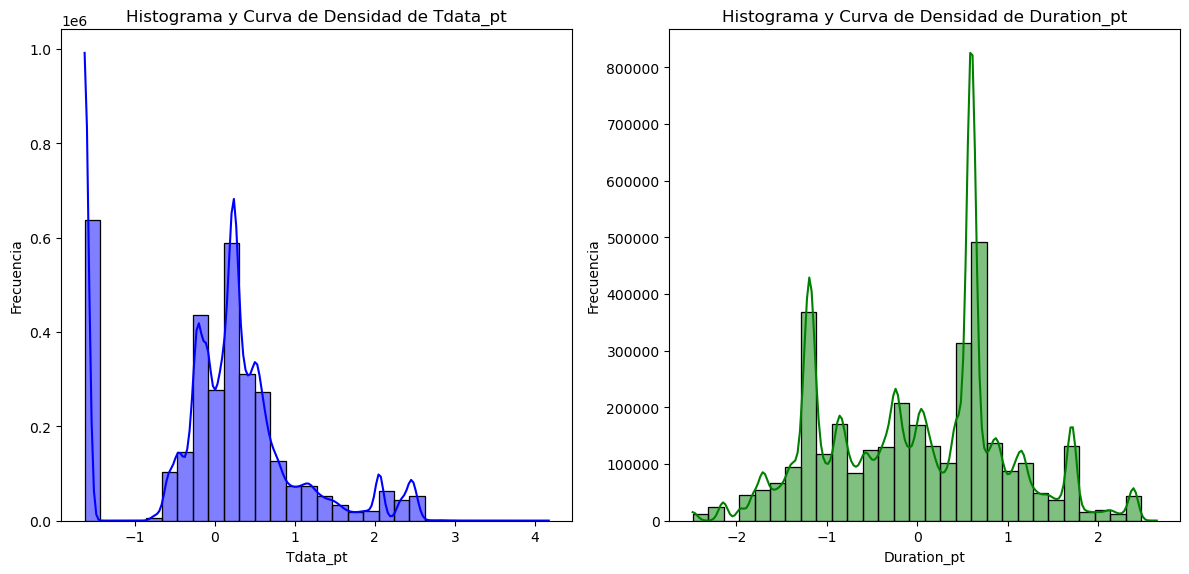

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas con curva de densidad para 'Tdata_pt' y 'Duration_pt'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma y curva de densidad para 'Tdata_pt'
sns.histplot(df['Tdata_pt'], bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Histograma y Curva de Densidad de Tdata_pt')
axs[0].set_xlabel('Tdata_pt')
axs[0].set_ylabel('Frecuencia')

# Histograma y curva de densidad para 'Duration_pt'
sns.histplot(df['Duration_pt'], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title('Histograma y Curva de Densidad de Duration_pt')
axs[1].set_xlabel('Duration_pt')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Cuantiles Uniformes: ####

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# O aplicar la transformación de cuantiles uniformes
qt = QuantileTransformer(output_distribution='uniform')
df[['Tdata_qt', 'Duration_qt']] = qt.fit_transform(df[['Tdata', 'Duration']])

# Estandarizar los datos transformados (aquí utilizando la transformación logarítmica como ejemplo)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Tdata_qt', 'Duration_qt']])

# Convertir a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=['Tdata_qt', 'Duration_qt'])

# Agregar APN_num sin escalar
df_standardized['APN_N'] = df['APN_N'].values

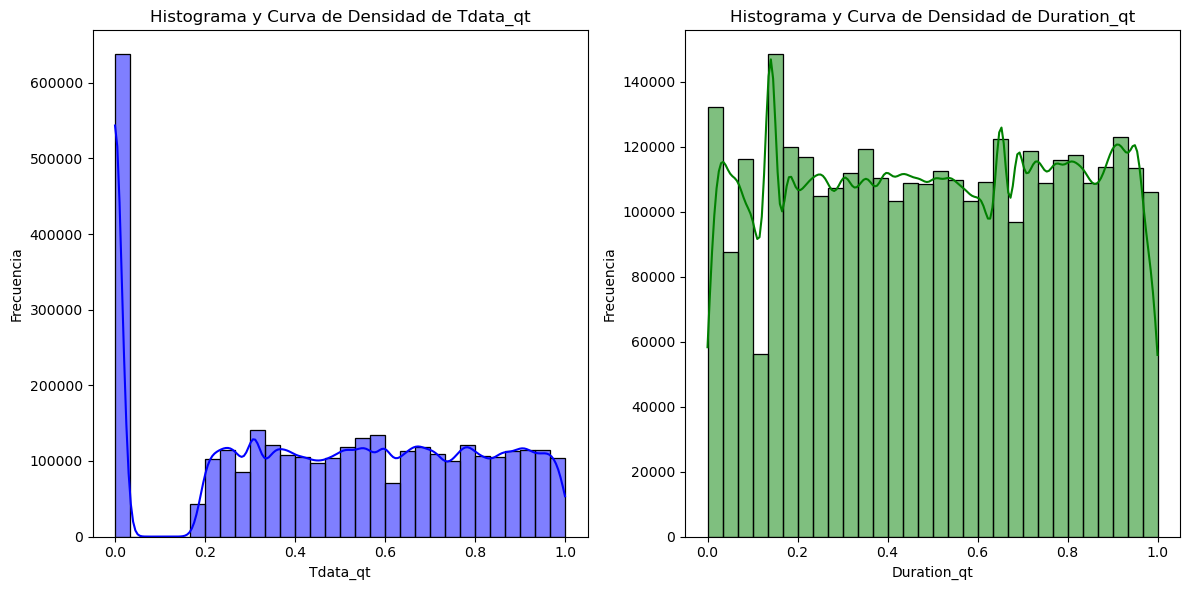

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas con curva de densidad para 'Tdata_qt' y 'Duration_qt'
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma y curva de densidad para 'Tdata_qt'
sns.histplot(df['Tdata_qt'], bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Histograma y Curva de Densidad de Tdata_qt')
axs[0].set_xlabel('Tdata_qt')
axs[0].set_ylabel('Frecuencia')

# Histograma y curva de densidad para 'Duration_qt'
sns.histplot(df['Duration_qt'], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title('Histograma y Curva de Densidad de Duration_qt')
axs[1].set_xlabel('Duration_qt')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Comparación de métodos ###
Mediante boxplot vamos a comparar éste último procedimiento

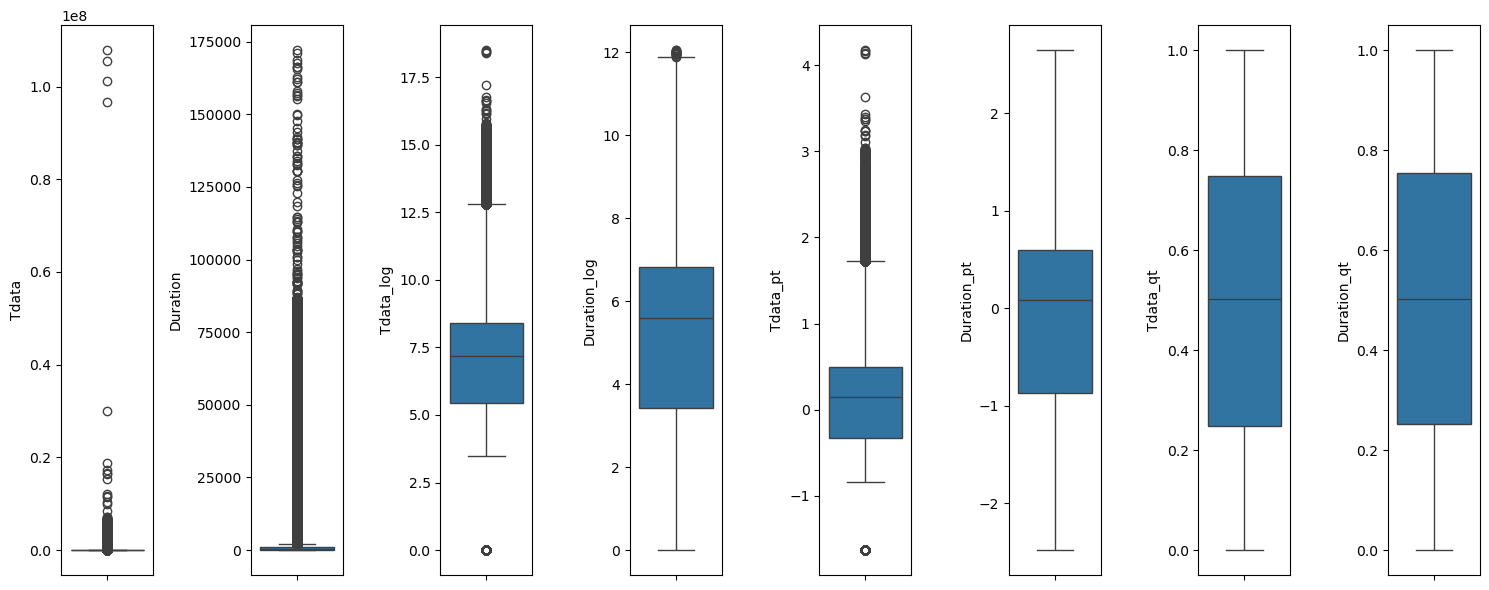

In [45]:
# recomendado este paso cuando las variables tienen diferente naturaleza/escala

variables = ["Tdata",'Duration', 'Tdata_log',
             'Duration_log', 'Tdata_pt',
             'Duration_pt','Tdata_qt', 'Duration_qt']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

Se observa que fue una buena decisión intentar mejorar la distribución de Tdata y Duration mediante distitas técnicas:
* **Transformación Logarítmica:**
Mejoró la variabilidad de los datos, aunque mantuvo gran cantidad de outlayers en Tdata y algunos en Duration.

* **Transformación de Potencia (Power Transformation):**
De manea similar a lo anterior mantuvo grn cantidad de datos como outlayer en Tdata. No se obseserva eso en Duration.

* **Cuantiles uniformes:**
El mejor resultado se observa para ésta transformación que ha dado los mejores resultados.